In [7]:
import os
os.chdir(r"C:\Mohit\Imperial\fyp-hearts")

In [10]:
import models.baseline_resnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

In [11]:
datafolder = os.getcwd()+'/datasets/PTB-XL/'
X, Y = utils.load_dataset(datafolder, sampling_rate=100)

In [14]:
Y.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr'],
      dtype='object')

In [20]:
len(Y.patient_id.unique())

18869

In [23]:
check = Y.groupby('patient_id')['strat_fold'].unique()

for i in check.index:
    if len(check.loc[i]) > 1:
        print(check.loc[i])

In [25]:
check = Y.groupby('site')['strat_fold'].unique()

for i in check.index:
    if len(check.loc[i]) > 1:
        print(check.loc[i])

[ 3  2  5  4  7  9 10  8  6  1]
[ 5  3  7  6  8  9  2  1  4 10]
[ 8  2  3  6  9 10  5  7  1  4]
[ 9  6  5  8  7  3 10  4  2  1]
[ 3 10  6  5  8  9  2  7  1  4]
[ 3  2 10  6  4  8  7  5  1  9]
[ 2  9  8  1 10  6  3  4  5  7]
[ 2  8 10  9  4  1  3  5  7  6]
[ 5  2  4  7  9 10  1  8  6  3]
[ 7  8  9 10  1  4  6  5  2]
[ 7  1  2  4  9  3  8 10  5  6]
[ 6  3  1  2  8  7 10  4  5]
[ 2  7 10  4  1  5  3  8  6]
[ 1  2  4  9  8 10  5  7  6  3]
[ 6  2  4 10  8  9  7  1  3]
[ 7  2  4  3 10  8  6  5  1]
[ 9 10  5  4  6  1  7  2  3  8]
[ 6  4  3  9  7  2  8 10  1]
[10  7  6  4  5  9  1  8  3]
[ 6  1  8  5 10  2  4  9  7  3]
[ 1  7  9 10  4  2  3  8  6]
[ 2  8  9  7  5  1  3 10]
[9 2 1 8 3 4 5 6]
[ 4  7  6  5  3  9  1  8 10]
[ 4  6  2  9 10  7  8  1  3]
[ 4 10  8  5  1  6  2  7]
[ 2  3  9  4  6  7  5  1  8 10]
[10  6  4  8  2  9  1  7  3  5]
[10  5  2  8  3  9  4]
[ 3 10  6  9  7  5  1  2]
[ 5  6  7  1  3 10  2  9]
[ 3  6  8  5  7  4 10  1]
[ 9  7  1  5 10  4  6]
[ 8  1  6  4  7 10  9]
[7 4 5 9 6 3 

In [54]:
check = Y.groupby('nurse')['strat_fold'].unique()

for i in check.index:
    if len(check.loc[i]) > 1:
        print(i, check.loc[i], len(check.loc[i]))

0.0 [ 7  9  6  8  5 10  2  1  4  3] 10
1.0 [ 8  2  3  6  9 10  5  7  1  4] 10
2.0 [ 3  2  5  4  7  9 10  8  6  1] 10
3.0 [ 2  5  7  1  6  3  9 10  8  4] 10
4.0 [ 2  6  3  7  5  8  4  9  1 10] 10
5.0 [ 3  1  9  8  4  5  2  6 10  7] 10
6.0 [ 5  2  8  1  6  4  9  7 10  3] 10
7.0 [ 5  4  6  2  7  8 10  3  1  9] 10
8.0 [ 5  7  8 10  1  9  6  4  2  3] 10
9.0 [ 8  7 10  2  5  4  6  9  1  3] 10
10.0 [ 3  6  2  8  1  5 10  4  9  7] 10
11.0 [ 7  8  9  4 10  2  5  1  6  3] 10


0.0     8940
1.0     6294
2.0     5075
3.0      576
4.0      100
5.0       58
6.0       46
7.0       43
8.0       43
9.0       38
10.0      37
11.0      33
12.0      26
14.0      26
15.0      25
13.0      24
16.0      22
17.0      20
21.0      18
20.0      18
18.0      17
26.0      15
29.0      15
19.0      15
28.0      15
22.0      15
27.0      15
23.0      15
24.0      14
32.0      13
25.0      13
31.0      13
34.0      12
30.0      12
36.0      12
35.0      11
37.0      10
33.0      10
38.0      10
40.0       9
41.0       9
39.0       8
44.0       7
43.0       6
45.0       6
42.0       6
48.0       4
46.0       4
47.0       4
49.0       3
50.0       2
Name: site, dtype: int64

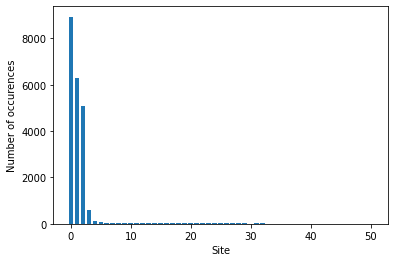

In [33]:
site_counts = Y['site'].value_counts()

plt.bar(site_counts.index, site_counts.values)
plt.xlabel("Site")
plt.ylabel("Number of occurences")

site_counts

0.0     8295
1.0     5709
5.0      648
3.0      642
2.0      639
7.0      639
4.0      635
6.0      631
8.0      626
10.0     626
11.0     619
9.0      617
Name: nurse, dtype: int64

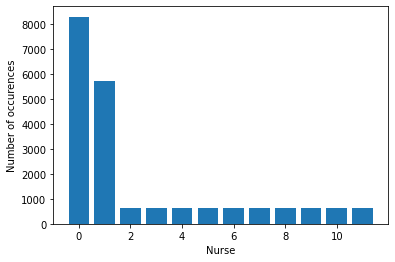

In [34]:
nurse_counts = Y['nurse'].value_counts()

plt.bar(nurse_counts.index, nurse_counts.values)
plt.xlabel("Nurse")
plt.ylabel("Number of occurences")

nurse_counts

In [37]:
site0 = Y[Y['site']==0]

site0_nurse_counts = site0['nurse'].value_counts()

site0_nurse_counts

0.0     8291
2.0      639
1.0        2
8.0        2
6.0        1
5.0        1
11.0       1
3.0        1
9.0        1
7.0        1
Name: nurse, dtype: int64

In [38]:
# Check which sites nurse 0 is at

nurse0 = Y[Y['nurse']==0]

nurse0_site_counts = nurse0['site'].value_counts()

nurse0_site_counts

0.0     8291
47.0       4
Name: site, dtype: int64

In [39]:
# Check total records from site47

site47 = Y[Y['site']==47]

site47_nurse_counts = site47['nurse'].value_counts()
site47_nurse_counts

0.0    4
Name: nurse, dtype: int64

In [51]:
groups = Y.groupby(['patient_id', 'site', 'nurse']).ngroup()
groups

ecg_id
1        12685
2        10674
3        16566
4        13735
5        14071
         ...  
21833    13876
21834    16852
21835    15700
21836     7003
21837     9431
Length: 21799, dtype: int64

In [52]:
8940/21700*100

41.19815668202765